# imports

In [287]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load data

In [288]:
df=pd.read_csv("gender_classification_v7.csv")

# explore data

In [289]:
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [290]:
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [292]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [293]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [294]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [295]:
if "Male" in df['gender'].unique():
    df['gender']=df['gender'].map({"Male":1,"Female":0})

df['gender'].unique()

array([1, 0], dtype=int64)

In [296]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


# draw a correlation mattrix

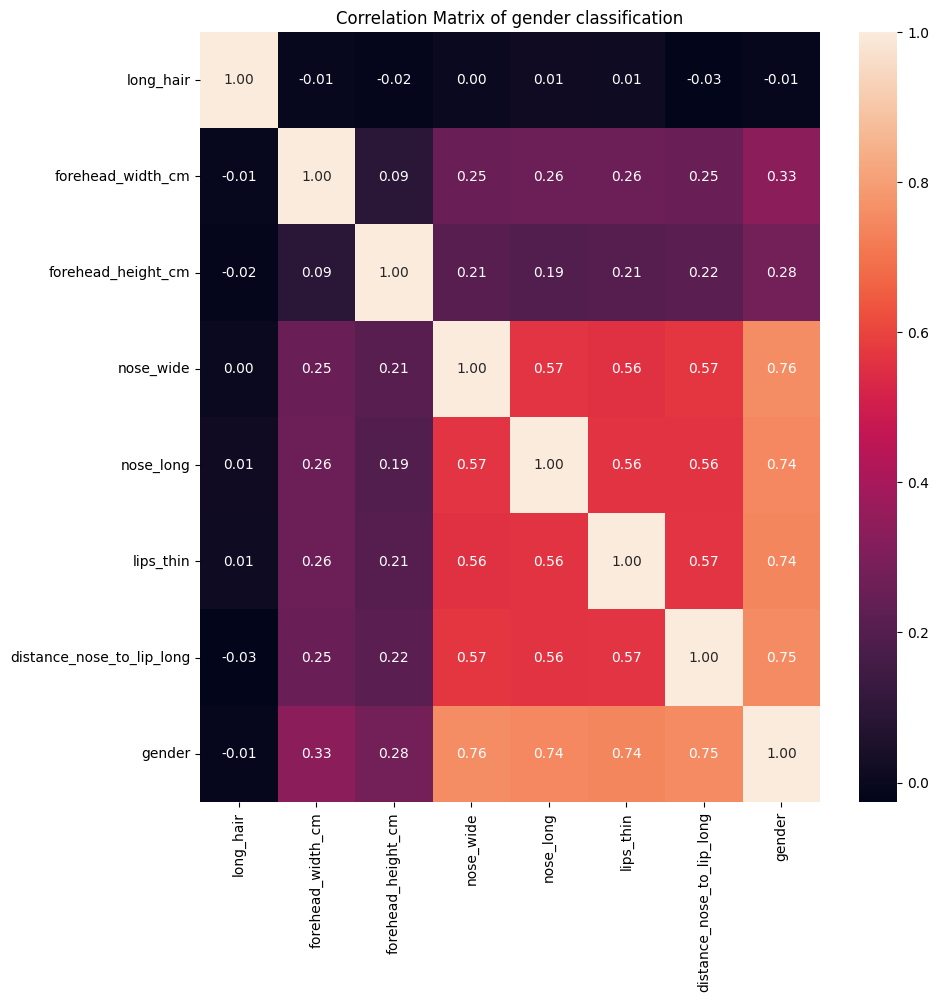

In [297]:
corrm=df.corr() 
plt.figure(figsize=(10,10))
sns.heatmap(corrm,annot=True,color="blue",fmt="0.2f")
plt.title('Correlation Matrix of gender classification')
plt.show()

In [298]:
threshold=0.3
features=corrm.index[abs(corrm['gender'])>threshold].tolist()
features.remove("gender")
features

['forehead_width_cm',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long']

# build the model

In [299]:
x=df[features]
y=df['gender']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [300]:
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

# evaluate model

In [301]:
ypre=model.predict(x_test)
accuracy_score=accuracy_score(y_test,ypre)
print("accuracy score:",accuracy_score*100,"%")
# if y try build model by decision tree accurcy will be 98.1% exactly

accuracy score: 95.80279813457695 %
